# Star Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
#import the libraries used for reviewing and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning

#import statsmodels and sklearn libraries for predictions
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

#import the different metric scores
from sklearn.metrics import(
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)


In [2]:
#Load the data set
data = pd.read_csv("StarHotelsGroup.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
#See how many columns and row in the data set
data.shape

(56926, 18)

In [4]:
#Look at the first 5 rows of the dataset
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [5]:
#Look at a random sample of the dataset 
data.sample(n = 10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
3644,3,0,1,0,Meal Plan 1,0,Room_Type 4,327,2019,1,16,Online,0,0,0,114.30,0,Not_Canceled
5398,2,0,1,2,Meal Plan 1,0,Room_Type 4,69,2019,6,30,Online,0,0,0,150.00,0,Canceled
28092,2,0,0,2,Meal Plan 2,0,Room_Type 1,56,2017,9,17,Offline,0,0,0,82.00,0,Not_Canceled
5591,1,0,0,1,Meal Plan 1,0,Room_Type 1,9,2017,10,30,Offline,0,0,0,95.00,0,Not_Canceled
19921,1,0,1,3,Meal Plan 1,0,Room_Type 1,35,2018,11,7,Online,0,0,0,199.00,2,Not_Canceled
37322,2,0,0,4,Meal Plan 2,0,Room_Type 1,120,2019,8,16,Online,0,0,0,183.00,2,Not_Canceled
15186,2,0,1,1,Meal Plan 1,0,Room_Type 1,94,2019,4,17,Online,0,0,0,126.00,0,Not_Canceled
7534,2,0,1,2,Not Selected,0,Room_Type 1,75,2019,4,24,Online,0,0,0,108.00,0,Not_Canceled
23999,2,0,1,1,Meal Plan 1,0,Room_Type 1,35,2017,10,17,Online,0,0,0,104.85,1,Not_Canceled
44548,2,0,1,3,Not Selected,0,Room_Type 1,30,2019,6,15,Online,0,0,0,160.00,1,Canceled


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

In [7]:
data[data.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [8]:
#start by looking at a summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,56926.0,1.875856,0.518667,0.0,2.0,2.0,2.0,4.0
no_of_children,56926.0,0.110723,0.408885,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,56926.0,0.835840,0.875900,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,56926.0,2.261901,1.432371,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,56926.0,0.026332,0.160123,0.0,0.0,0.0,0.0,1.0
lead_time,56926.0,93.713909,92.408296,0.0,21.0,65.0,142.0,521.0
arrival_year,56926.0,2018.248340,0.644619,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,56926.0,6.490215,3.027185,1.0,4.0,6.0,9.0,12.0
arrival_date,56926.0,15.635913,8.718717,1.0,8.0,16.0,23.0,31.0
repeated_guest,56926.0,0.024664,0.155099,0.0,0.0,0.0,0.0,1.0


#### Observations:  
   * It looks odd that in some cases there are 0 adults noted on the reseveration so I will need to look more closely at that.
   * Our reservation data is collected between the years of 2017 and 2019.  I think this variable should be categorical.
   * It appears that children are most often not included in the reservations
   * The average price per room is 109.61 but, there appears to be some significant variation with the max room price being 540
   * Looks like there is some significant variability in the lead_time with a minimun of 0 and a max lead_time of 521 days.
   * I need to take a closer look at the categorical variables.    

In [9]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
#write a function to further examine the categorical columns
catColumns = data.describe(include=['object']).columns

for i in catColumns:
    print(i, "- unique values are:")
    print(data[i].value_counts())
    print('*' * 50)



type_of_meal_plan - unique values are:
Meal Plan 1     42330
Not Selected    10072
Meal Plan 2      4516
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
**************************************************
room_type_reserved - unique values are:
Room_Type 1    42807
Room_Type 4    10413
Room_Type 6     1581
Room_Type 5      983
Room_Type 2      823
Room_Type 7      312
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
market_segment_type - unique values are:
Online           39490
Offline          13875
Corporate         2796
Complementary      536
Aviation           229
Name: market_segment_type, dtype: int64
**************************************************
booking_status - unique values are:
Not_Canceled    35378
Canceled        21548
Name: booking_status, dtype: int64
**************************************************


In [11]:
#change the object variables to category data type
data['type_of_meal_plan']=data['type_of_meal_plan'].astype('category')
data['room_type_reserved']=data['room_type_reserved'].astype('category')
data['market_segment_type']=data['market_segment_type'].astype('category')
data['booking_status']=data['booking_status'].astype('category')

In [12]:
#confirm the datatype changes made
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          56926 non-null  int64   
 1   no_of_children                        56926 non-null  int64   
 2   no_of_weekend_nights                  56926 non-null  int64   
 3   no_of_week_nights                     56926 non-null  int64   
 4   type_of_meal_plan                     56926 non-null  category
 5   required_car_parking_space            56926 non-null  int64   
 6   room_type_reserved                    56926 non-null  category
 7   lead_time                             56926 non-null  int64   
 8   arrival_year                          56926 non-null  int64   
 9   arrival_month                         56926 non-null  int64   
 10  arrival_date                          56926 non-null  int64   
 11  ma

#### Observations:
These look okay.  I don't see anything problematic with these values.  I'll use One Hot encoding for these variables to prepare them for the model.


In [13]:
#write a function to graph the numeric variables
def boxHistPlot (data, feature, figsize =(12,7), kde=False, bins = None):
    f2, (ax_box2, ax_hist2)= plt.subplots(nrows=2,sharex=False,gridspec_kw={"height_ratios": (0.25,0.75)},figsize=figsize)
    sns.boxplot(data=data, x=feature,ax = ax_box2, showmeans = True, color="orange")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins = bins, palette ='blues'
    )    if bins  else sns.histplot(data=data,x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color='orange', linestyle='--')
    ax_hist2.axvline(data[feature].median(), color ='purple', linestyle='-.')

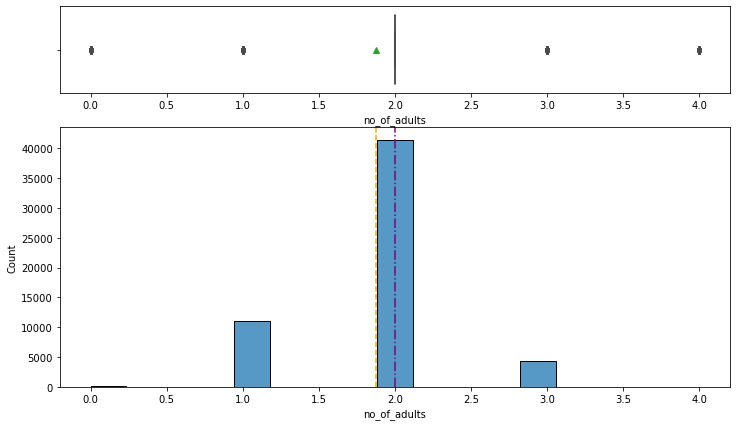

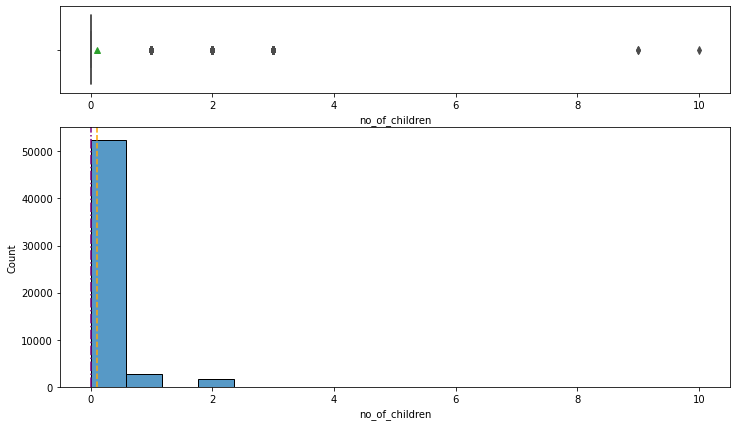

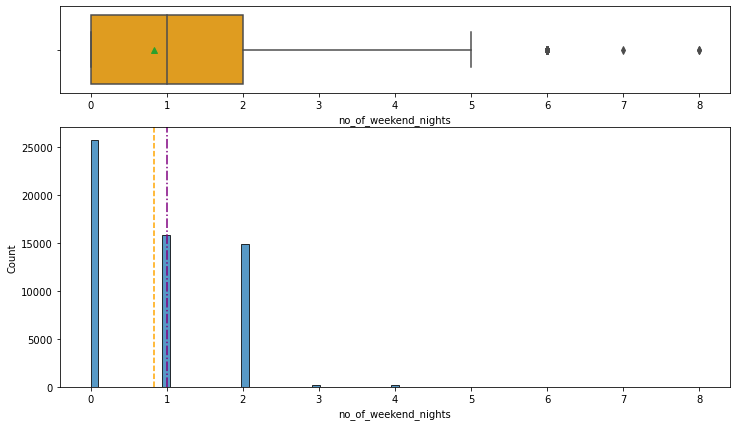

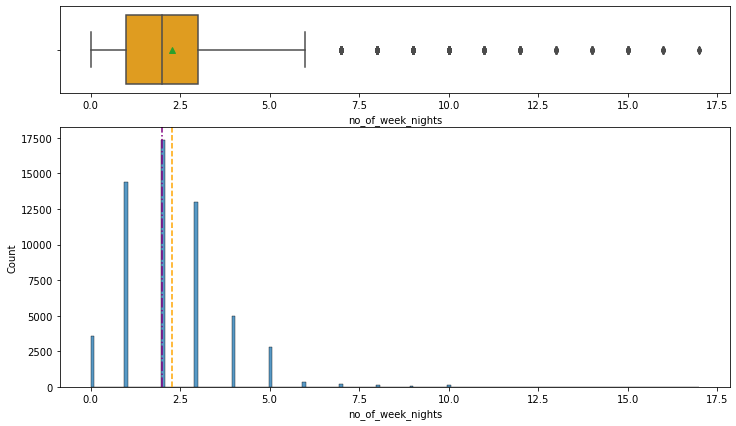

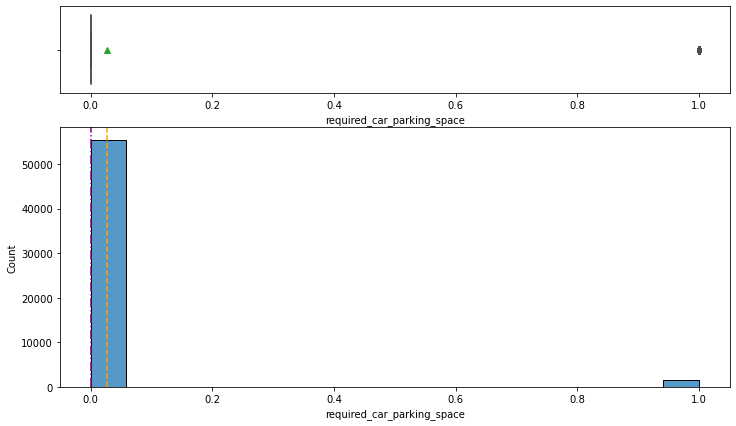

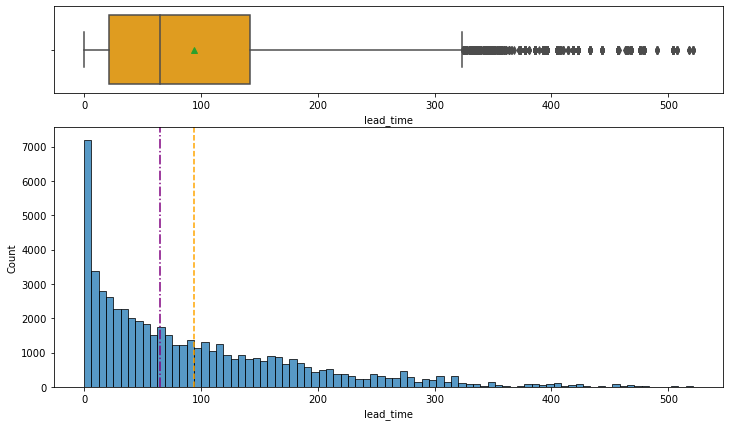

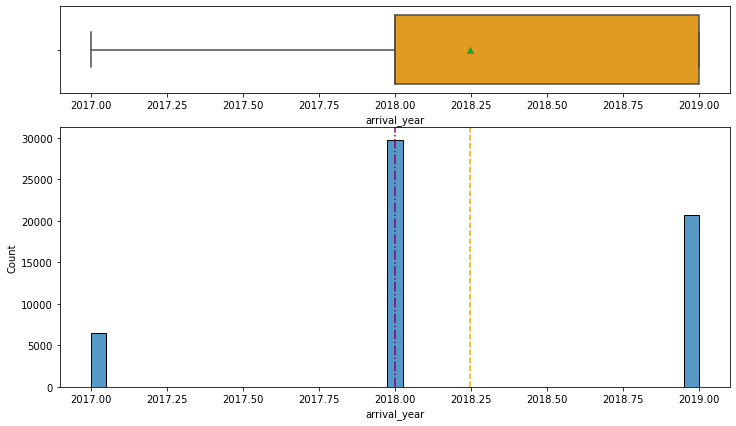

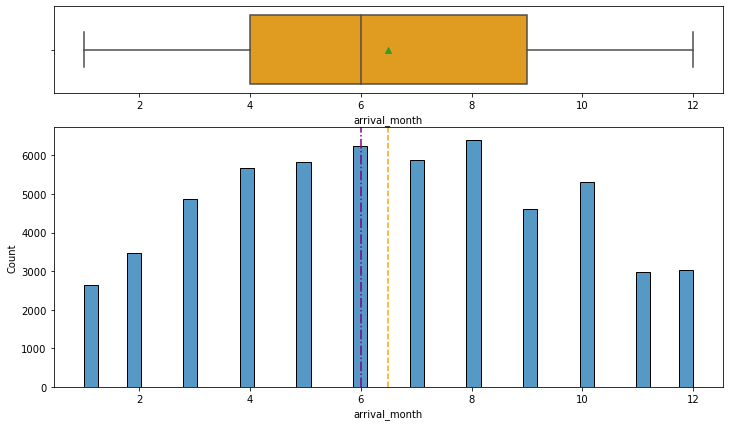

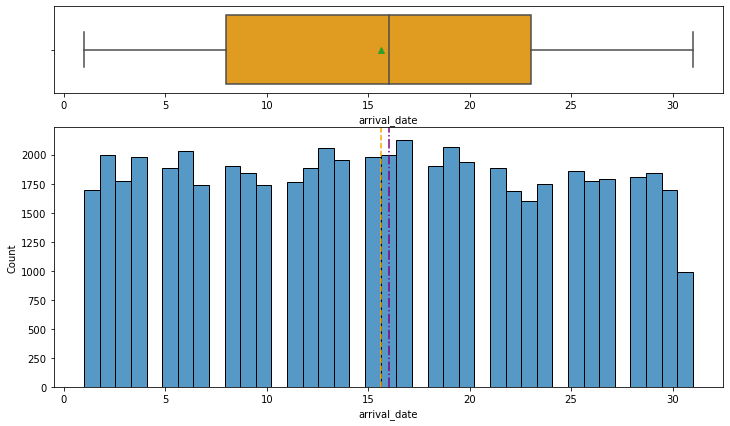

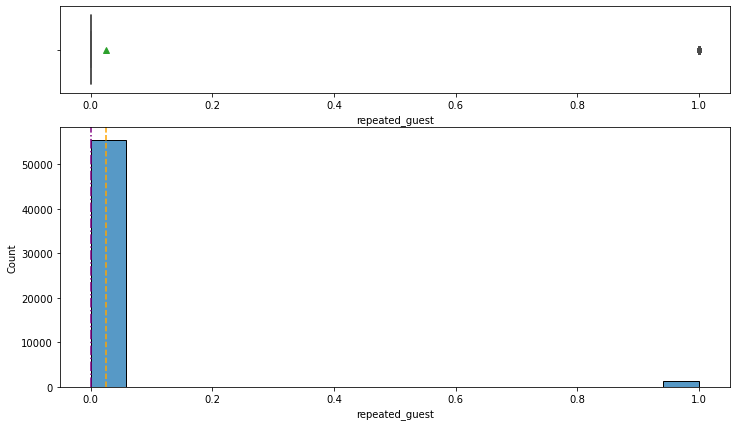

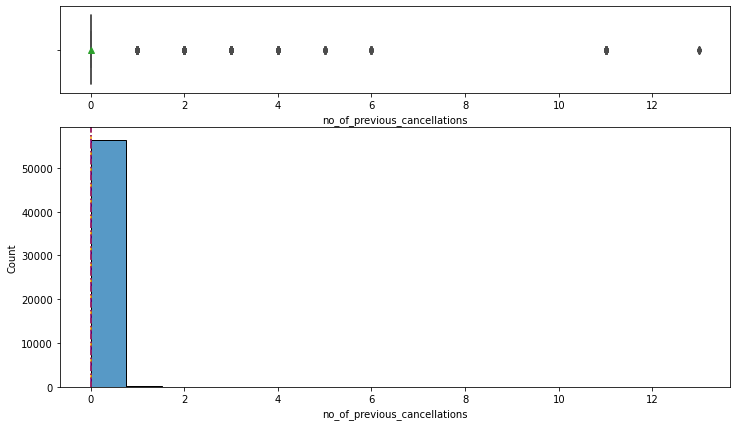

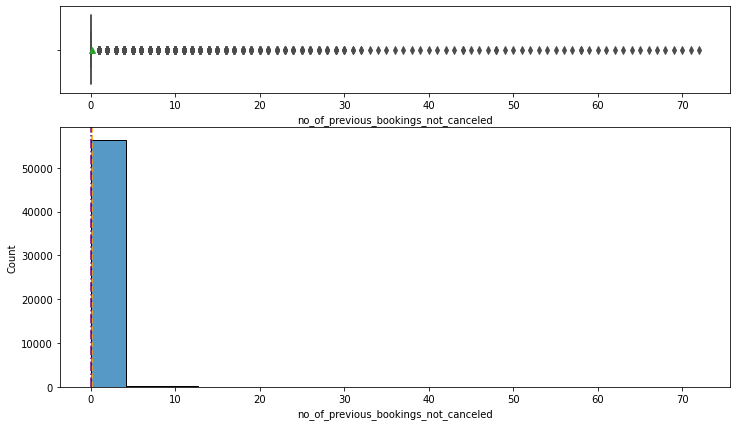

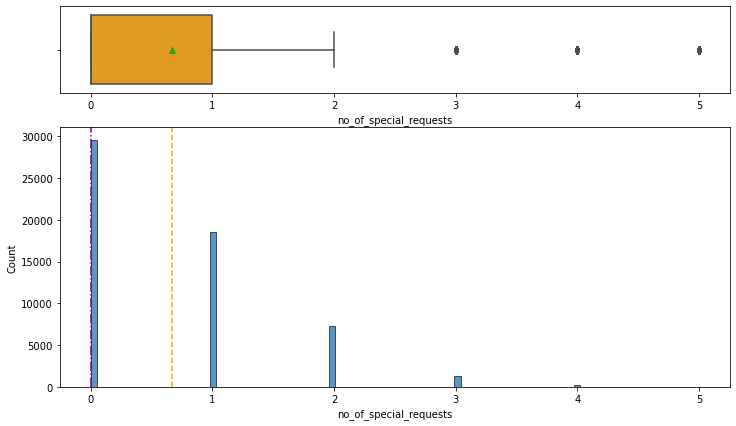

In [14]:
#run the graph on all of the numerical columns
numCols = data.select_dtypes(include = ['int64'])
for i in numCols:
    boxHistPlot(data=data, feature = i)
    plt.show()

#### Observations:
* None of these variables looks very normalized.  There are significant outliers in several of the variables.  We need to run the model without addressing outliers first.
* It would be helpful for Year to be a categorical variable
* Reservations are most often made for 2 adults.  There are records which show 0 adults which is obviously incorrect.  I can change the 0 to one or 2 (the mean) but maybe there is value keeping these records as is.  Perhaps when bookings are made, if incomplete information is provided that may impact whether or not the reservation is cancelled.  So I will leave the 0 adult records unchanged.
* It would be helpful to treat repeated_guest as a categorical value.

In [15]:
# write a function to visualize the categorical variables
def barPlot (data, feature, perc = True, n = None):
    total = len(data[feature])
    count = data[feature].nunique()
    
    plt.xticks(rotation=45, fontsize= 10)
    ax = sns.countplot(data = data, x=feature, palette = "summer")
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format( 100*  p.get_height()/total)
        else:
            lable = p.get_height()
    
        x = p.get_x()+p.get_width()/2
        y = p.get_height()
    
        ax.annotate(label,(x,y),ha='center',va='center',xytext =(0,5), textcoords = 'offset points')
    
    plt.show()


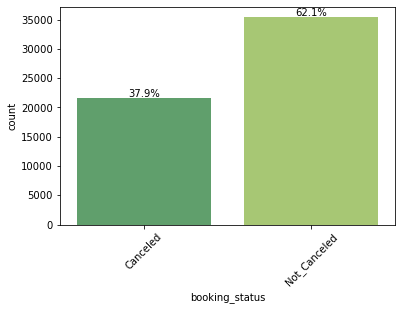

In [16]:
barPlot(data, "booking_status")

####  38% of reservations in our dataset were cancelled. Yikes

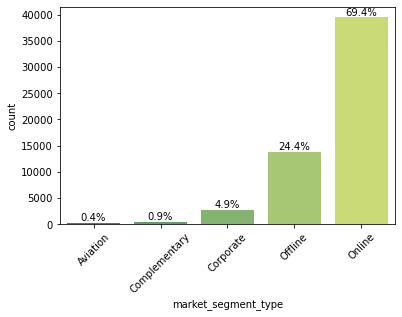

In [17]:
barPlot(data, 'market_segment_type')

#### 69.4% of these reservations were made online.  

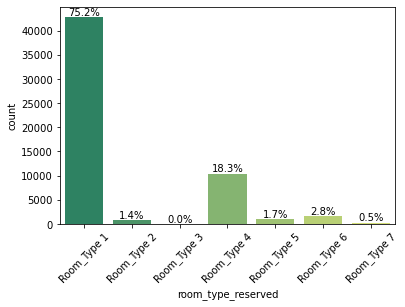

In [18]:
barPlot (data, 'room_type_reserved')

#### room_type 1 is far and away the most frequently reserved room.  

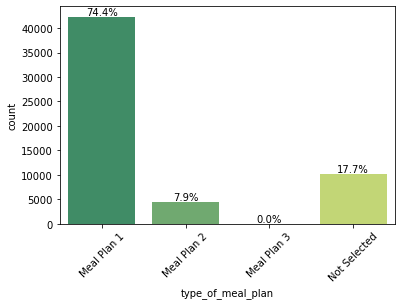

In [19]:
barPlot(data, 'type_of_meal_plan')

####  Meal plan 1, just breakfast is selected 74% of the time with none selected as the second most frequent option.  Those two options account for over 90% of the reservations in our dataset.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [20]:
#get the value counts for each month
data['arrival_month'].value_counts().sort_values(ascending=False)

8     6402
6     6238
7     5870
5     5832
4     5664
10    5317
3     4872
9     4611
2     3476
12    3021
11    2980
1     2643
Name: arrival_month, dtype: int64

#### August is the busiest month for the hotel and January is the least busy month.

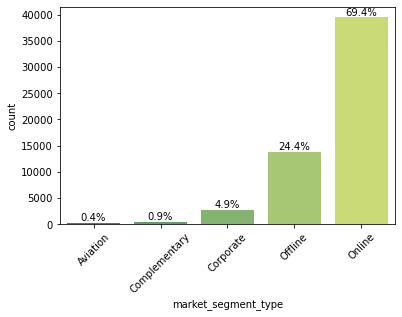

In [21]:
barPlot(data,'market_segment_type')

#### 69 percent of reservations are made online.  

Star Hotels most often gets the highest price from rooms booked online. 

In [23]:
#write a function to create a stacked barplot

def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

no_of_previous_cancellations      0    1   2   3   4   5   6  11  13    All
repeated_guest                                                             
1                               889  316  66  47  25  16  16  25   4   1404
All                           56411  316  66  47  25  16  16  25   4  56926
0                             55522    0   0   0   0   0   0   0   0  55522
----------------------------------------------------------------------------------------------------


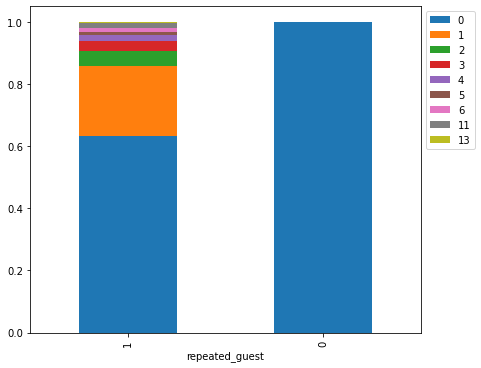

In [173]:
stacked_barplot(data,'repeated_guest','no_of_previous_cancellations')

Repeat customers are the only ones showing that they have cancelled their reservation.  Does this mean that non-repeat guest information was not captured so we can't tell that the same people are making reservations and cancelling them?

no_of_special_requests      0      1     2     3    4   5    All
booking_status                                                  
Not_Canceled            15390  12837  5607  1356  169  19  35378
All                     29574  18540  7268  1356  169  19  56926
Canceled                14184   5703  1661     0    0   0  21548
----------------------------------------------------------------------------------------------------


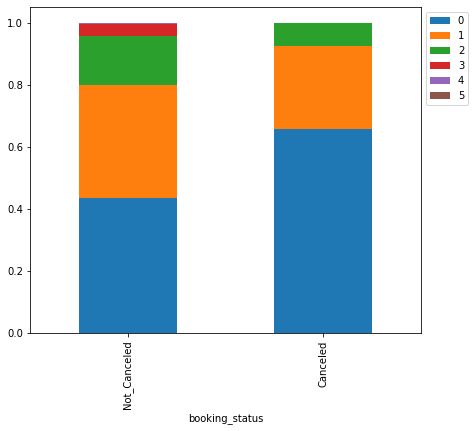

In [25]:
#Compare the number of previous cancellations to the number of special requests
stacked_barplot(data,'booking_status', 'no_of_special_requests')

Those guests that are cancelling often make special requests.  

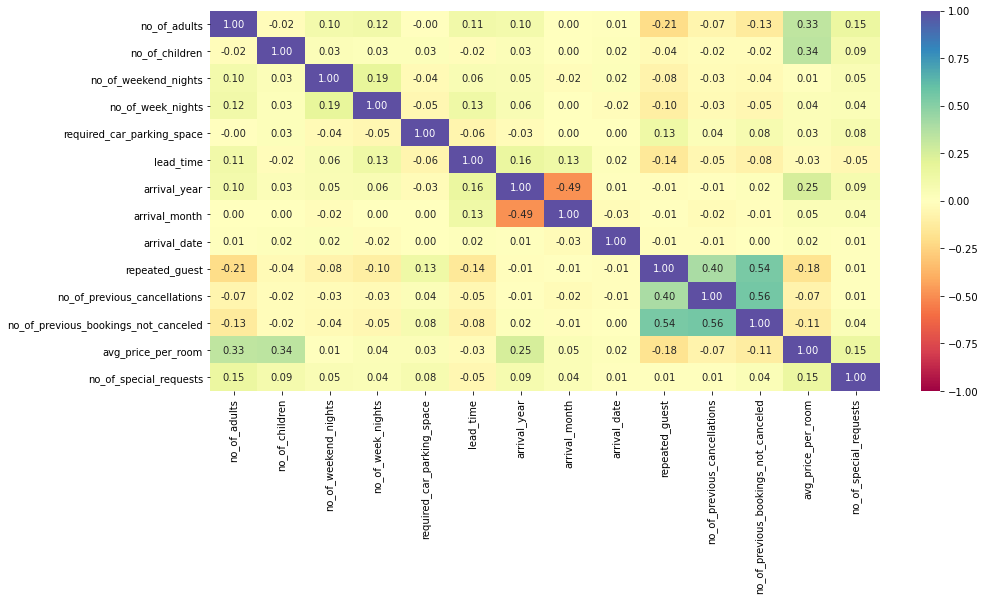

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [27]:
data.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.021332,0.101229,0.116523,-0.001461,0.113424,0.098570,0.003215,0.014824,-0.205643,-0.065427,-0.126954,0.331559,0.153151
no_of_children,-0.021332,1.000000,0.031819,0.030661,0.025765,-0.019155,0.032706,0.000755,0.016995,-0.036691,-0.017254,-0.021779,0.338714,0.089906
no_of_weekend_nights,0.101229,0.031819,1.000000,0.185336,-0.035813,0.056802,0.054315,-0.021936,0.023649,-0.075067,-0.027877,-0.037064,0.008179,0.047123
no_of_week_nights,0.116523,0.030661,0.185336,1.000000,-0.051439,0.130885,0.059103,0.001160,-0.019365,-0.104117,-0.034001,-0.050506,0.035575,0.044674
required_car_parking_space,-0.001461,0.025765,-0.035813,-0.051439,1.000000,-0.062856,-0.027445,0.001746,0.001885,0.125221,0.035190,0.078025,0.033954,0.076476
lead_time,0.113424,-0.019155,0.056802,0.130885,-0.062856,1.000000,0.157634,0.127886,0.022819,-0.140789,-0.052234,-0.079741,-0.029736,-0.048761
arrival_year,0.098570,0.032706,0.054315,0.059103,-0.027445,0.157634,1.000000,-0.490269,0.012375,-0.014350,-0.006937,0.017742,0.250745,0.085919
arrival_month,0.003215,0.000755,-0.021936,0.001160,0.001746,0.127886,-0.490269,1.000000,-0.028505,-0.005285,-0.024436,-0.011998,0.045899,0.043598
arrival_date,0.014824,0.016995,0.023649,-0.019365,0.001885,0.022819,0.012375,-0.028505,1.000000,-0.011806,-0.010539,0.000706,0.017488,0.010443
repeated_guest,-0.205643,-0.036691,-0.075067,-0.104117,0.125221,-0.140789,-0.014350,-0.005285,-0.011806,1.000000,0.403749,0.543240,-0.175313,0.013476


I don't see any very significant correlations between the variables.  There is some correlations between repeated_guest and no_of_previous_bookings_not_canceled, which makes sense but there is also some correlation between no_of_previous_bookings_not_canceled and no_of_previous_cancellations.  

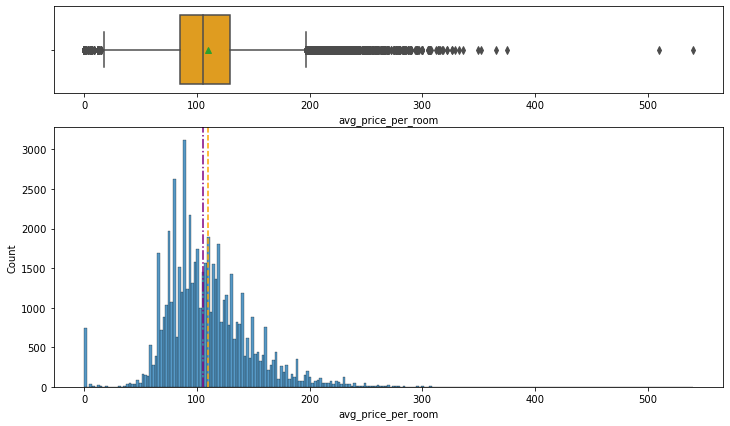

In [28]:
boxHistPlot(data=data, feature = "avg_price_per_room")

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,56926.0,1.875856,0.518667,0.0,2.0,2.0,2.0,4.0
no_of_children,56926.0,0.110723,0.408885,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,56926.0,0.835840,0.875900,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,56926.0,2.261901,1.432371,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,56926.0,0.026332,0.160123,0.0,0.0,0.0,0.0,1.0
lead_time,56926.0,93.713909,92.408296,0.0,21.0,65.0,142.0,521.0
arrival_year,56926.0,2018.248340,0.644619,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,56926.0,6.490215,3.027185,1.0,4.0,6.0,9.0,12.0
arrival_date,56926.0,15.635913,8.718717,1.0,8.0,16.0,23.0,31.0
repeated_guest,56926.0,0.024664,0.155099,0.0,0.0,0.0,0.0,1.0


#### Average price per room varies quite a bit with a number of outliers and some 0 amounts.  I will plan to treat this variable in data preprocessing.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [51]:
#make a copy of the dataset before I start manipulating it
data2=data.copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          56926 non-null  int64   
 1   no_of_children                        56926 non-null  int64   
 2   no_of_weekend_nights                  56926 non-null  int64   
 3   no_of_week_nights                     56926 non-null  int64   
 4   type_of_meal_plan                     56926 non-null  category
 5   required_car_parking_space            56926 non-null  int64   
 6   room_type_reserved                    56926 non-null  category
 7   lead_time                             56926 non-null  int64   
 8   arrival_year                          56926 non-null  int64   
 9   arrival_month                         56926 non-null  int64   
 10  arrival_date                          56926 non-null  int64   
 11  ma

In [52]:
#drop the duplicate records
data2.drop_duplicates(inplace=True)

In [53]:
data2.shape

(42576, 18)

In [54]:
#change year to a categorical value
data2['arrival_year']= data2['arrival_year'].astype('category')

In [55]:
#confirm that datatype change on arrival_year
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  category
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

In [56]:
data2['lead_time_in_years'] = data2[('lead_time')].astype("float64")/365
data2.drop(['lead_time'],axis=1,inplace=True)

In [57]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   arrival_year                          42576 non-null  category
 8   arrival_month                         42576 non-null  int64   
 9   arrival_date                          42576 non-null  int64   
 10  market_segment_type                   42576 non-null  category
 11  re

In [58]:
#drop no_of_children
data2.drop('no_of_children', inplace = True, axis=1)

In [59]:
#impute the mean for the rooms with an avg_price_per_night of 0

data2.avg_price_per_room = data2.avg_price_per_room.apply(lambda x: 109.61 if x == 0 else x)

In [60]:
#bin the avg_price_per_room

bins = [0, 85, 105,130,600]
labels =["Less_than85", "Between_85_and_105", "Between_105_and_130","Between_130_and_600"]
data2['avg_price_per_room_binned'] = pd.cut(data2['avg_price_per_room'], bins, labels=labels)
data2.sample(n = 10)


,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,lead_time_in_years,avg_price_per_room_binned
16418,3,2,2,Meal Plan 1,0,Room_Type 4,2019,7,28,Offline,0,0,0,140.40,0,Not_Canceled,0.353425,Between_130_and_600
38990,2,2,2,Meal Plan 1,0,Room_Type 1,2019,7,30,Online,0,0,0,169.00,1,Not_Canceled,0.120548,Between_130_and_600
7785,2,2,3,Meal Plan 1,0,Room_Type 4,2018,9,25,Online,0,0,0,137.34,2,Not_Canceled,0.095890,Between_130_and_600
22298,2,0,3,Meal Plan 1,0,Room_Type 1,2018,7,6,Offline,0,0,0,85.00,0,Not_Canceled,0.194521,Less_than85
24360,2,0,3,Meal Plan 1,0,Room_Type 1,2018,6,9,Online,0,0,0,97.71,0,Canceled,0.238356,Between_85_and_105
3977,2,0,2,Meal Plan 2,0,Room_Type 1,2018,8,19,Online,0,0,0,115.00,0,Canceled,0.797260,Between_105_and_130
43811,2,0,4,Meal Plan 1,0,Room_Type 1,2019,7,5,Online,0,0,0,107.10,1,Canceled,0.715068,Between_105_and_130
21633,1,0,3,Not Selected,0,Room_Type 1,2019,7,11,Online,0,0,0,89.10,1,Canceled,0.531507,Between_85_and_105
28874,0,0,1,Meal Plan 1,0,Room_Type 2,2018,8,18,Online,0,0,0,97.54,1,Not_Canceled,0.391781,Between_85_and_105
46462,2,1,1,Not Selected,0,Room_Type 1,2018,11,19,Online,0,0,0,79.20,3,Not_Canceled,0.243836,Less_than85


In [61]:
data2.isnull().sum()

no_of_adults                            0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
lead_time_in_years                      0
avg_price_per_room_binned               0
dtype: int64

In [62]:
#drop avg_price_per_room now that we haved the binned variable
data2.drop('avg_price_per_room', inplace = True, axis=1)

In [63]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_weekend_nights                  42576 non-null  int64   
 2   no_of_week_nights                     42576 non-null  int64   
 3   type_of_meal_plan                     42576 non-null  category
 4   required_car_parking_space            42576 non-null  int64   
 5   room_type_reserved                    42576 non-null  category
 6   arrival_year                          42576 non-null  category
 7   arrival_month                         42576 non-null  int64   
 8   arrival_date                          42576 non-null  int64   
 9   market_segment_type                   42576 non-null  category
 10  repeated_guest                        42576 non-null  int64   
 11  no

In [64]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,1.916737,0.527524,0.0,2.000000,2.000000,2.000000,4.000000
no_of_weekend_nights,42576.0,0.895270,0.887864,0.0,0.000000,1.000000,2.000000,8.000000
no_of_week_nights,42576.0,2.321167,1.519328,0.0,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,42576.0,0.034362,0.182160,0.0,0.000000,0.000000,0.000000,1.000000
arrival_month,42576.0,6.365488,3.051924,1.0,4.000000,6.000000,9.000000,12.000000
arrival_date,42576.0,15.682873,8.813991,1.0,8.000000,16.000000,23.000000,31.000000
repeated_guest,42576.0,0.030886,0.173011,0.0,0.000000,0.000000,0.000000,1.000000
no_of_previous_cancellations,42576.0,0.025413,0.358194,0.0,0.000000,0.000000,0.000000,13.000000
no_of_previous_bookings_not_canceled,42576.0,0.222731,2.242308,0.0,0.000000,0.000000,0.000000,72.000000
no_of_special_requests,42576.0,0.768109,0.837264,0.0,0.000000,1.000000,1.000000,5.000000


In [65]:
#Confirm the % booking status on the revised dataset
data2['booking_status'].value_counts(normalize = True)

Not_Canceled    0.659738
Canceled        0.340262
Name: booking_status, dtype: float64

In [66]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,1.916737,0.527524,0.0,2.000000,2.000000,2.000000,4.000000
no_of_weekend_nights,42576.0,0.895270,0.887864,0.0,0.000000,1.000000,2.000000,8.000000
no_of_week_nights,42576.0,2.321167,1.519328,0.0,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,42576.0,0.034362,0.182160,0.0,0.000000,0.000000,0.000000,1.000000
arrival_month,42576.0,6.365488,3.051924,1.0,4.000000,6.000000,9.000000,12.000000
arrival_date,42576.0,15.682873,8.813991,1.0,8.000000,16.000000,23.000000,31.000000
repeated_guest,42576.0,0.030886,0.173011,0.0,0.000000,0.000000,0.000000,1.000000
no_of_previous_cancellations,42576.0,0.025413,0.358194,0.0,0.000000,0.000000,0.000000,13.000000
no_of_previous_bookings_not_canceled,42576.0,0.222731,2.242308,0.0,0.000000,0.000000,0.000000,72.000000
no_of_special_requests,42576.0,0.768109,0.837264,0.0,0.000000,1.000000,1.000000,5.000000


In [67]:
data2.describe(include=['category']).T

,count,unique,top,freq
type_of_meal_plan,42576,4,Meal Plan 1,31863
room_type_reserved,42576,7,Room_Type 1,29730
arrival_year,42576,3,2018,22107
market_segment_type,42576,5,Online,34169
booking_status,42576,2,Not_Canceled,28089
avg_price_per_room_binned,42576,4,Between_130_and_600,12057


In [68]:
# no_of_previous_bookings_not_canceled and required parking space are mostly 0 so I am going to drop those columns
data2.drop('no_of_previous_bookings_not_canceled', inplace = True, axis=1)
data2.drop('required_car_parking_space', inplace=True, axis=1)

#### In the revised dataset I have 42576 rows of data and 66% were not canceled and 34% were canceled.

In [69]:
data2['booking_status']= data2['booking_status'].apply(lambda x: 1 if x=="Not_Canceled" else 0)

In [75]:
#split the data and add the constant
x = data2.drop('booking_status', axis =1)
y = data2['booking_status']


# Use one hot encoding to get dummy variables
x = pd.get_dummies(x, drop_first=True)

#add a constant
x=sm.add_constant(x)

x

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_special_requests,lead_time_in_years,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,arrival_year_2019,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,avg_price_per_room_binned_Between_85_and_105,avg_price_per_room_binned_Between_105_and_130,avg_price_per_room_binned_Between_130_and_600
0,1.0,2,1,2,10,2,0,0,0,0.613699,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.0,2,2,3,11,6,0,0,1,0.013699,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,1.0,1,2,1,2,28,0,0,0,0.002740,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1.0,2,0,2,5,20,0,0,0,0.578082,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,1.0,3,0,3,7,13,0,0,2,0.758904,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56920,1.0,2,2,6,7,1,0,0,2,0.405479,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
56921,1.0,2,0,1,6,15,0,0,1,0.123288,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
56922,1.0,2,1,1,5,15,0,0,1,0.876712,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
56923,1.0,2,0,3,4,21,0,0,0,0.172603,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [77]:
#Fix the column names that have spaces
x.columns = [col.replace(" ","_") for col in x.columns]

In [78]:
#split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1)
print("Train set shape =", x_train.shape)
print("Train set breakout between cancelled and non cancelled =", y_train.value_counts(normalize = True))
print("*"*50)
print("Test set shape", x_test.shape)
print("Test set breakout between cancelled and non cancelled =", y_test.value_counts(normalize = True))

Train set shape = (29803, 28)
Train set breakout between cancelled and non cancelled = 1    0.661074
0    0.338926
Name: booking_status, dtype: float64
**************************************************
Test set shape (12773, 28)
Test set breakout between cancelled and non cancelled = 1    0.656619
0    0.343381
Name: booking_status, dtype: float64


This looks okay.  I still have 34% percent cancellations in both the train and test datasets.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [79]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29803 entries, 52247 to 42831
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   const                                          29803 non-null  float64
 1   no_of_adults                                   29803 non-null  int64  
 2   no_of_weekend_nights                           29803 non-null  int64  
 3   no_of_week_nights                              29803 non-null  int64  
 4   arrival_month                                  29803 non-null  int64  
 5   arrival_date                                   29803 non-null  int64  
 6   repeated_guest                                 29803 non-null  int64  
 7   no_of_previous_cancellations                   29803 non-null  int64  
 8   no_of_special_requests                         29803 non-null  int64  
 9   lead_time_in_years                            

In [80]:
x_train.head()

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_special_requests,lead_time_in_years,type_of_meal_plan_Meal_Plan_2,type_of_meal_plan_Meal_Plan_3,type_of_meal_plan_Not_Selected,room_type_reserved_Room_Type_2,room_type_reserved_Room_Type_3,room_type_reserved_Room_Type_4,room_type_reserved_Room_Type_5,room_type_reserved_Room_Type_6,room_type_reserved_Room_Type_7,arrival_year_2018,arrival_year_2019,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,avg_price_per_room_binned_Between_85_and_105,avg_price_per_room_binned_Between_105_and_130,avg_price_per_room_binned_Between_130_and_600
52247,1.0,1,0,2,1,26,0,0,0,0.041096,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8414,1.0,1,1,0,2,21,0,0,1,0.049315,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
44196,1.0,3,0,2,10,7,0,0,2,0.578082,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
28535,1.0,1,2,1,7,25,0,0,0,0.301370,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18280,1.0,3,0,3,4,20,0,0,0,0.147945,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


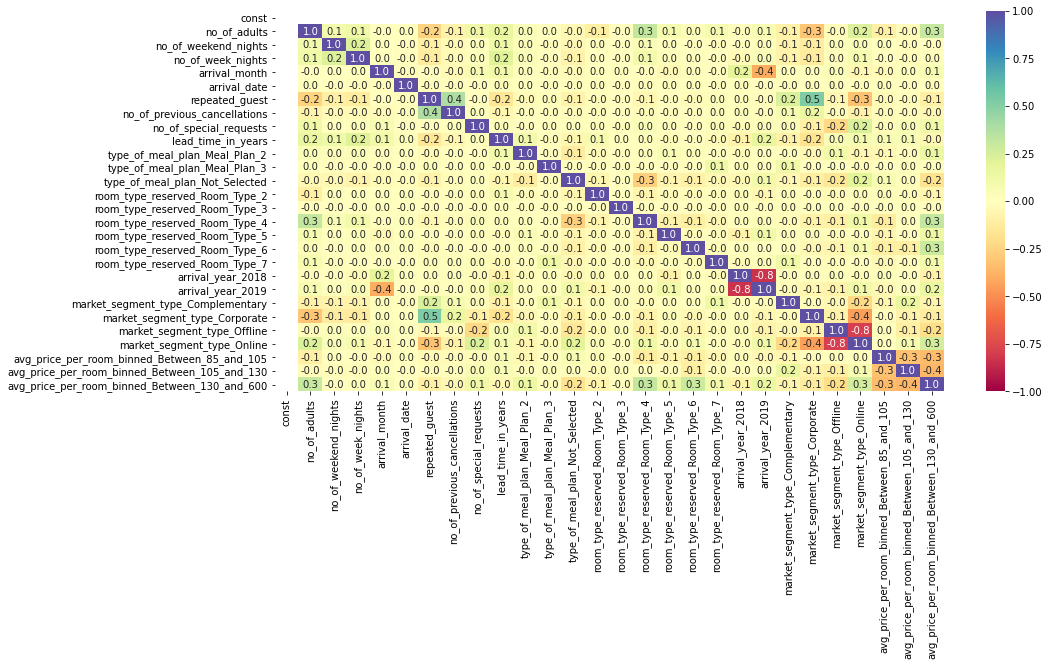

In [81]:
plt.figure(figsize=(15, 7))
sns.heatmap(x_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral")
plt.show()

#### There is some correlation between arrival years and market segments.  We will take a closer look.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [82]:
vif_series = pd.Series([variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
                      index = x_train.columns, dtype=float,)
print("Series before feature selection:  \n\n{}\n".format(vif_series))

Series before feature selection:  

const                                            267.740427
no_of_adults                                       1.395696
no_of_weekend_nights                               1.081859
no_of_week_nights                                  1.132884
arrival_month                                      1.530537
arrival_date                                       1.004773
repeated_guest                                     1.809974
no_of_previous_cancellations                       1.190354
no_of_special_requests                             1.099534
lead_time_in_years                                 1.317241
type_of_meal_plan_Meal_Plan_2                      1.077879
type_of_meal_plan_Meal_Plan_3                      1.026415
type_of_meal_plan_Not_Selected                     1.327353
room_type_reserved_Room_Type_2                     1.049768
room_type_reserved_Room_Type_3                     1.001266
room_type_reserved_Room_Type_4                     1.442817
room

#### There is some multicolinearity in market_segment_type so I am going to remove those variables

In [83]:
#drop the market segment columns
x_train1 = x_train.drop(['market_segment_type_Online',
           'market_segment_type_Offline',
           'market_segment_type_Corporate',
           'market_segment_type_Complementary'], axis=1)
x_test1 = x_test.drop(['market_segment_type_Online',
           'market_segment_type_Offline',
           'market_segment_type_Corporate',
           'market_segment_type_Complementary'], axis=1)

In [84]:
vif_series = pd.Series([variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
                      index = x_train1.columns, dtype=float,)
print("Series before feature selection:  \n\n{}\n".format(vif_series))

Series before feature selection:  

const                                            45.757239
no_of_adults                                      1.329147
no_of_weekend_nights                              1.075693
no_of_week_nights                                 1.126177
arrival_month                                     1.507448
arrival_date                                      1.004038
repeated_guest                                    1.323201
no_of_previous_cancellations                      1.182627
no_of_special_requests                            1.048913
lead_time_in_years                                1.298686
type_of_meal_plan_Meal_Plan_2                     1.057679
type_of_meal_plan_Meal_Plan_3                     1.016709
type_of_meal_plan_Not_Selected                    1.214290
room_type_reserved_Room_Type_2                    1.037856
room_type_reserved_Room_Type_3                    1.000754
room_type_reserved_Room_Type_4                    1.429986
room_type_reserved_R

That mostly addressed the multicolinearity.  The VIF on year is high, so I am going to remove that year variable as well.

In [85]:
#drop the arrival year columns
x_train2 = x_train1.drop(['arrival_year_2018',
           'arrival_year_2019'], axis=1)
x_test2 = x_test1.drop(['arrival_year_2018',
           'arrival_year_2019'], axis=1)

In [86]:
vif_series = pd.Series([variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])],
                      index = x_train2.columns, dtype=float,)
print("Series before feature selection:  \n\n{}\n".format(vif_series))

Series before feature selection:  

const                                            28.978502
no_of_adults                                      1.323889
no_of_weekend_nights                              1.074995
no_of_week_nights                                 1.125452
arrival_month                                     1.031509
arrival_date                                      1.003541
repeated_guest                                    1.311755
no_of_previous_cancellations                      1.181857
no_of_special_requests                            1.048334
lead_time_in_years                                1.139667
type_of_meal_plan_Meal_Plan_2                     1.052993
type_of_meal_plan_Meal_Plan_3                     1.016678
type_of_meal_plan_Not_Selected                    1.154198
room_type_reserved_Room_Type_2                    1.034383
room_type_reserved_Room_Type_3                    1.000657
room_type_reserved_Room_Type_4                    1.427746
room_type_reserved_R

#### Now there is no longer multicolinearity in the dataset


## Building a Logistic Regression model

In [87]:
# Use Statsmodels to build a Logistic Regression Model
logit = sm.Logit(y_train, x_train2.astype(float))
lg = logit.fit(disp=False, maxiter=10000)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29781
Method:                           MLE   Df Model:                           21
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                  0.2779
Time:                        17:03:22   Log-Likelihood:                -13781.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.3642      0.084     28.059      0.000       2.199       2.529
no_of_adults              

In [88]:
#write a function to calculate the performance metrics

def model_performance(model, predictors, target, threshold=0.5):
    
    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [89]:
#write a function to create a confusion matrix

def make_confusion_matrix(model, predictors, target, threshold=0.5):
    
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [90]:
model_performance(lg, x_train2, y_train)

,Accuracy,Recall,Precision,F1
0,0.779519,0.885798,0.801543,0.841567


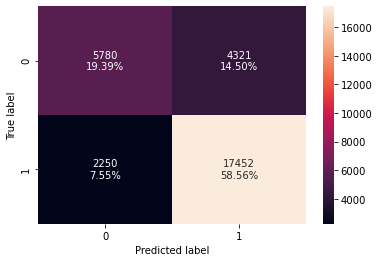

In [91]:
make_confusion_matrix(lg, x_train2, y_train)

In [92]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False, maxinter= 200000)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'lead_time_in_years', 'type_of_meal_plan_Meal_Plan_2', 'type_of_meal_plan_Not_Selected', 'room_type_reserved_Room_Type_2', 'room_type_reserved_Room_Type_6', 'room_type_reserved_Room_Type_7', 'avg_price_per_room_binned_Between_85_and_105', 'avg_price_per_room_binned_Between_105_and_130', 'avg_price_per_room_binned_Between_130_and_600']


In [101]:
x_train3=x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [102]:
# Use Statsmodels to build a Logistic Regression Model
logit2 = sm.Logit(y_train, x_train3.astype(float))
lg2 = logit2.fit(disp = False, maxiter=5000)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29787
Method:                           MLE   Df Model:                           15
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                  0.2776
Time:                        17:18:40   Log-Likelihood:                -13786.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.3444      0.058     40.303      0.000       2.230       2.458
no_of_weekend_nights      

In [103]:
base_model_perf= model_performance(lg2, x_train3, y_train)
base_model_perf

,Accuracy,Recall,Precision,F1
0,0.778982,0.886001,0.800844,0.841273


#### None of the predictors have a p value greater than .05 so we consider the variables in x_train3 the final set and lg2 as the final model.

#### Convert the Coefficients to odds

In [104]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train3.columns)

,Odds,Change_odd%
const,10.426966,942.696643
no_of_weekend_nights,0.961233,-3.876678
no_of_week_nights,0.911773,-8.822730
arrival_month,1.057915,5.791538
repeated_guest,28.735643,2773.564288
no_of_previous_cancellations,0.789110,-21.088990
no_of_special_requests,2.982195,198.219463
lead_time_in_years,0.003681,-99.631920
type_of_meal_plan_Meal_Plan_2,1.395820,39.581981
type_of_meal_plan_Not_Selected,0.500885,-49.911493


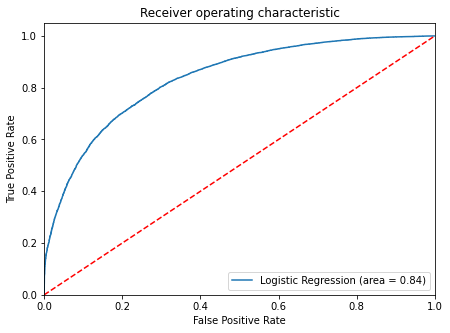

In [174]:
#Using ROC-AUC analysis on the training set

logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(x_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(x_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [106]:
# This model is giving a good performance on the training set.  I will try to optimize the f1 score by changing threshold.

fpr, trr, thresholds = roc_curve(y_train, lg2.predict(x_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.644218381255789


In [107]:
logreg_model_train_perf_thresh_aucroc = model_performance(
    lg2, x_train3, y_train, threshold = optimal_threshold_auc_roc)
logreg_model_train_perf_thresh_aucroc

,Accuracy,Recall,Precision,F1
0,0.761467,0.779616,0.847355,0.812075


#### This increased precision but the other metrics have been reduced.   The model is still performing ok.

#### I'll try the Precision - Recall curve to see if I can find a better threshold

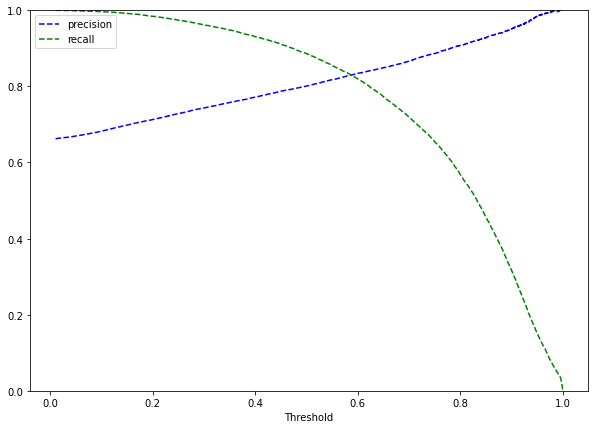

In [108]:
y_scores = lg2.predict(x_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [109]:
optimal_threshold = .59

In [110]:

log_reg_model_train_perf_threshold_curve = model_performance(
    lg2, x_train3, y_train, threshold=optimal_threshold
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.77462,0.827784,0.830693,0.829236


## Model performance evaluation

In [111]:
# comparison

models_train_comp_df = pd.concat(
    [
        base_model_perf.T,
        logreg_model_train_perf_thresh_aucroc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regregression-0.50 Threshold",
    "Logistic Regression-0.69 Threshold",
    "Logistic Regression-0.59 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regregression-0.50 Threshold,Logistic Regression-0.69 Threshold,Logistic Regression-0.59 Threshold
Accuracy,0.778982,0.761467,0.774620
Recall,0.886001,0.779616,0.827784
Precision,0.800844,0.847355,0.830693
F1,0.841273,0.812075,0.829236


In [112]:
# Check the performance on the test set

log_reg_model_test_perf_threshold_curve = model_performance(
    lg2, x_test3, y_test, threshold=optimal_threshold
)
print("Training performance:")
log_reg_model_test_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.770532,0.825802,0.824917,0.825359


In [113]:
base_model_perf_test= model_performance(lg2, x_test3, y_test)
base_model_perf_test

,Accuracy,Recall,Precision,F1
0,0.778595,0.886372,0.798582,0.84019


In [114]:
logreg_model_test_perf_thresh_aucroc = model_performance(
    lg2, x_test3, y_test, threshold = optimal_threshold_auc_roc)
logreg_model_test_perf_thresh_aucroc

,Accuracy,Recall,Precision,F1
0,0.76145,0.782044,0.843276,0.811506


## Final Model Summary

In [116]:
# comparison

models_train_comp_df = pd.concat(
    [
        base_model_perf_test.T,
        logreg_model_test_perf_thresh_aucroc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regregression-0.50 Threshold",
    "Logistic Regression-0.69 Threshold",
    "Logistic Regression-0.59 Threshold",
]

print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Logistic Regregression-0.50 Threshold,Logistic Regression-0.69 Threshold,Logistic Regression-0.59 Threshold
Accuracy,0.778595,0.761450,0.770532
Recall,0.886372,0.782044,0.825802
Precision,0.798582,0.843276,0.824917
F1,0.840190,0.811506,0.825359


#### The model is perfoming well on both the training and test datasets.
* This is a predictive model that can be used to identify reservations that are likely to be cancelled.
* The models demonstrated here have been generalized to give good performance on both the training and test datasets.
* Some of the predictors are positive

## Building a Decision Tree model

#### Model evaluation criteria
Incorrect Predictions and Consequences:
1. Predict a customer will cancel and they don't.  If actions are taken to prevent bookings that will be cancelled, this could potentially result in loss of revenue.
2. Predit a customer will not cancel and they do.  This basically leaves us in the current situation will lost or dimished profits.

It's worse to lose customers entirely but we are left with the result we are trying to correct.  So ultimately we really need to balance both but, we can focus on identifying the cancellations with a policy toward addressing those that are likely to cancel.


In [176]:
#Build the Decision Tree Model
model=DecisionTreeClassifier(criterion = 'gini',class_weight={0: 0.34, 1: 0.66}, random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.34, 1: 0.66}, random_state=1)

In [177]:
decision_tree_perf_train= model_performance(model, x_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.995839,1.0,0.993746,0.996863


In [178]:
#Build the Decision Tree Model on test data
model=DecisionTreeClassifier(criterion = 'gini',class_weight={0: 0.34, 1: 0.66}, random_state=1)
model.fit(x_test, y_test)

DecisionTreeClassifier(class_weight={0: 0.34, 1: 0.66}, random_state=1)

In [179]:
decision_tree_perf_test= model_performance(model, x_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.998043,0.999762,0.997265,0.998511


#### The model is giving good results on both the training and test dataset. 

#### Now we will visualize the Decision Tree

In [180]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['const', 'no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'lead_time_in_years', 'type_of_meal_plan_Meal_Plan_2', 'type_of_meal_plan_Meal_Plan_3', 'type_of_meal_plan_Not_Selected', 'room_type_reserved_Room_Type_2', 'room_type_reserved_Room_Type_3', 'room_type_reserved_Room_Type_4', 'room_type_reserved_Room_Type_5', 'room_type_reserved_Room_Type_6', 'room_type_reserved_Room_Type_7', 'arrival_year_2018', 'arrival_year_2019', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'avg_price_per_room_binned_Between_85_and_105', 'avg_price_per_room_binned_Between_105_and_130', 'avg_price_per_room_binned_Between_130_and_600']


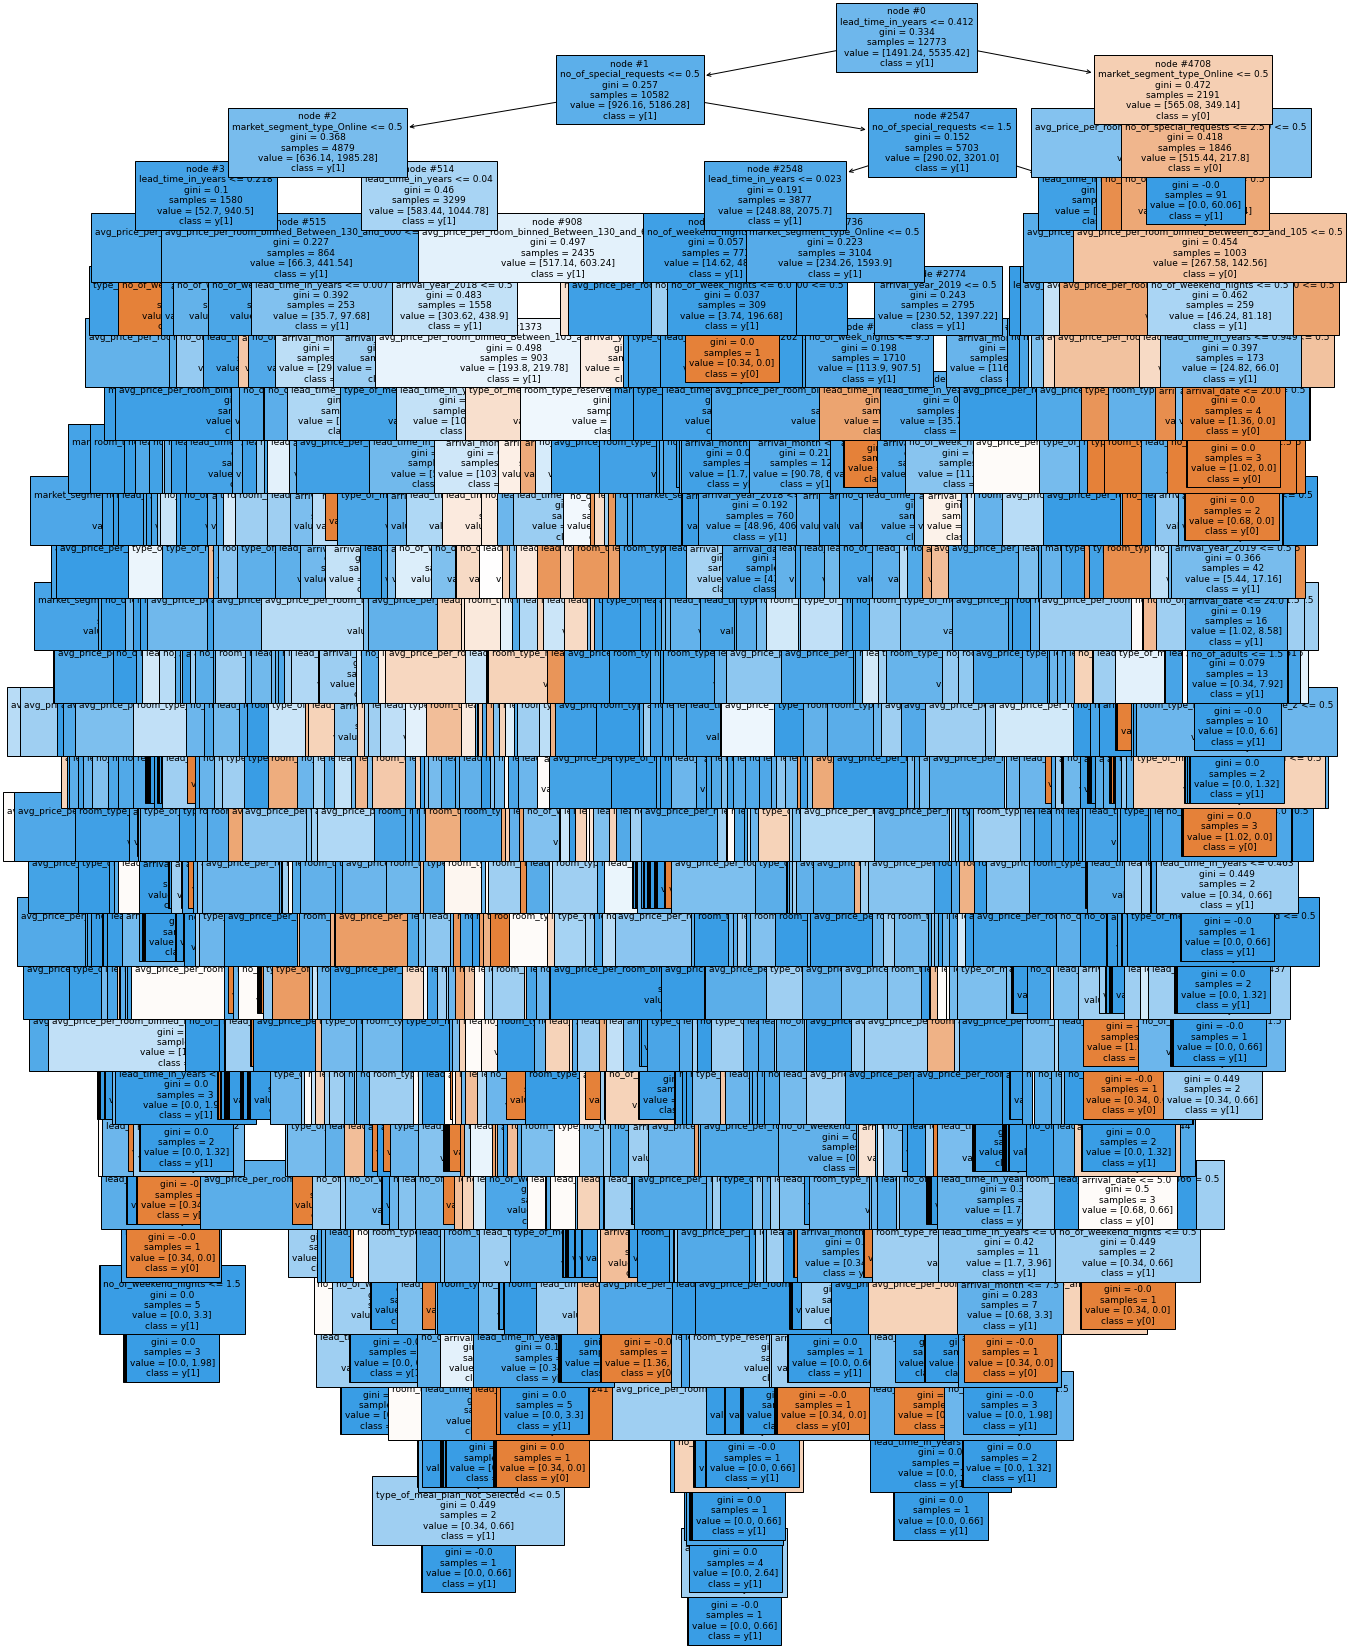

In [181]:
plt.figure(figsize= (20,30))

out = tree.plot_tree( model, feature_names = feature_names,
                    filled=True,
                    fontsize=9,
                    node_ids=True,
                    class_names=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        
plt.show()

In [127]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time_in_years <= 0.41
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_in_years <= 0.22
|   |   |   |   |--- no_of_week_nights <= 10.50
|   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- market_segment_type_Complementary <= 0.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 16.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- arrival_date >  16.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 18.50
|   |   |   |   |   |   |   

In [129]:
print(pd.DataFrame(model.feature_importances_,columns=["Imp"], 
                    index=x_train.columns).sort_values(by="Imp", ascending =False))

                                                    Imp
lead_time_in_years                             0.372896
arrival_date                                   0.115041
market_segment_type_Online                     0.089615
no_of_special_requests                         0.085758
arrival_month                                  0.078824
no_of_week_nights                              0.062543
no_of_weekend_nights                           0.043331
avg_price_per_room_binned_Between_130_and_600  0.027701
no_of_adults                                   0.022270
avg_price_per_room_binned_Between_105_and_130  0.018729
type_of_meal_plan_Not_Selected                 0.016793
avg_price_per_room_binned_Between_85_and_105   0.016567
room_type_reserved_Room_Type_4                 0.012841
arrival_year_2018                              0.010147
arrival_year_2019                              0.008546
type_of_meal_plan_Meal_Plan_2                  0.006024
room_type_reserved_Room_Type_5                 0

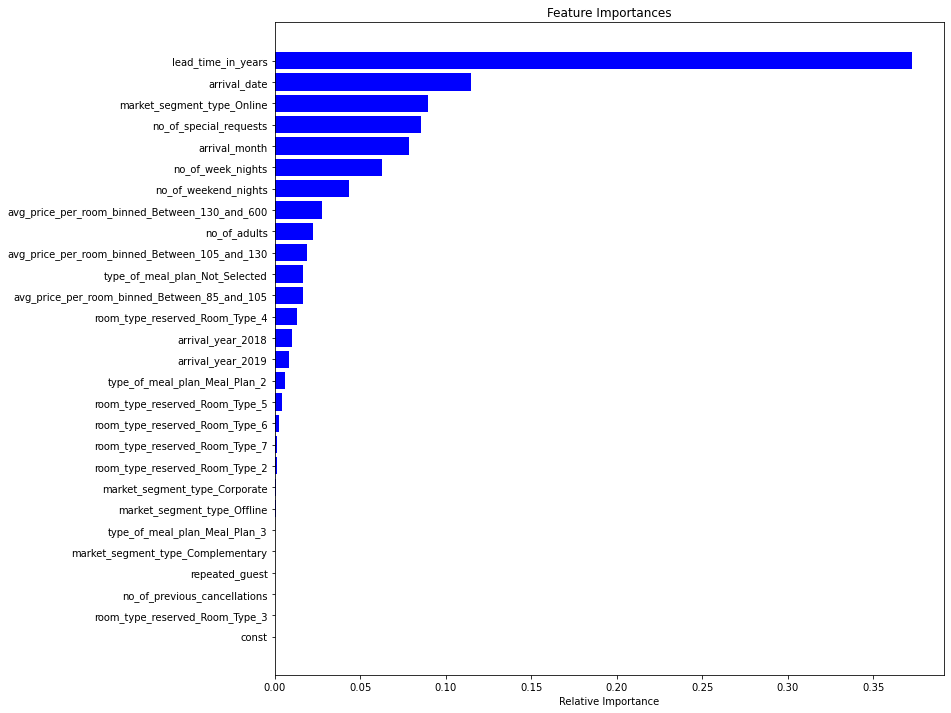

In [132]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time in years is the most important variable for predicting the cancelation. 
* Even though we are getting good results on the train and test data, the model is complicated and hard to interpret.
* We will try both grid search and cost complexity pruning to better control the size of this tree.

In [182]:
# Grid Search Hyperparameter tuning
from sklearn.metrics import (make_scorer)

estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.34, 1: 0.66})

parameters = {'max_depth': np.arange(5, 10, 15, None), 
              'splitter': ['best', 'random'],
              'min_impurity_decrease': [0.00001,0.0001,0.01]}


# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.34, 1: 0.66}, max_depth=5,
                       min_impurity_decrease=0.0001, random_state=1)

In [183]:
# Check the performance on the training set
decision_tree_tune_perf_train = model_performance(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.77254,0.986854,0.748873,0.851549


In [184]:
# Check the performance on the test set
decision_tree_tune_perf_test = model_performance(
    estimator, x_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.767243,0.985096,0.743654,0.847515


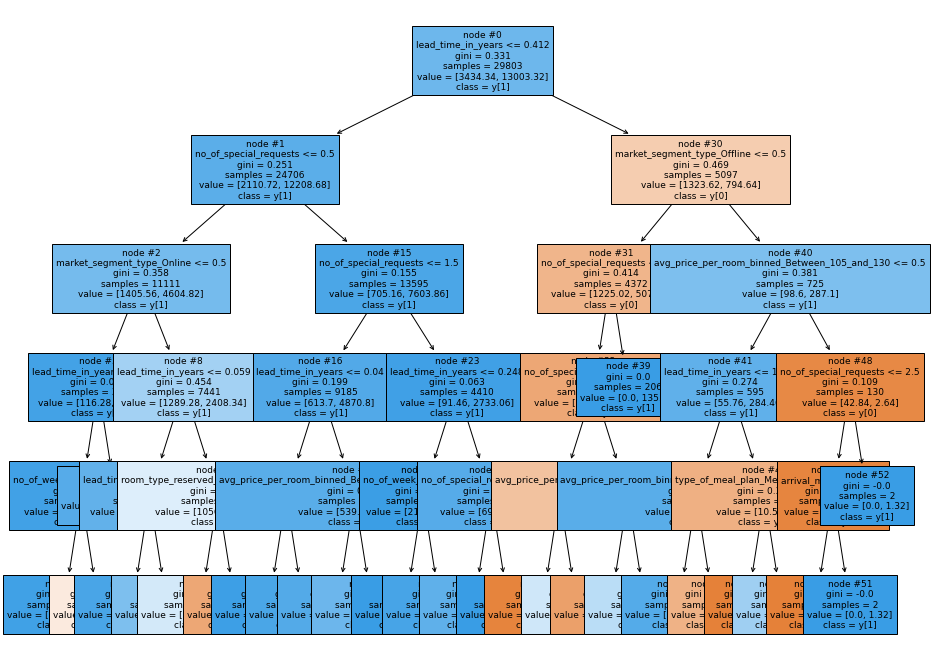

In [185]:
# After hyperparameter tuning the model performance is still good and the model is simplified.  
# Visualise the tree again
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

#### The model has been simplified and it is still performing well.  We will now use Cost Complexity pruning to see if we can further prune the tree and maintain good performance.

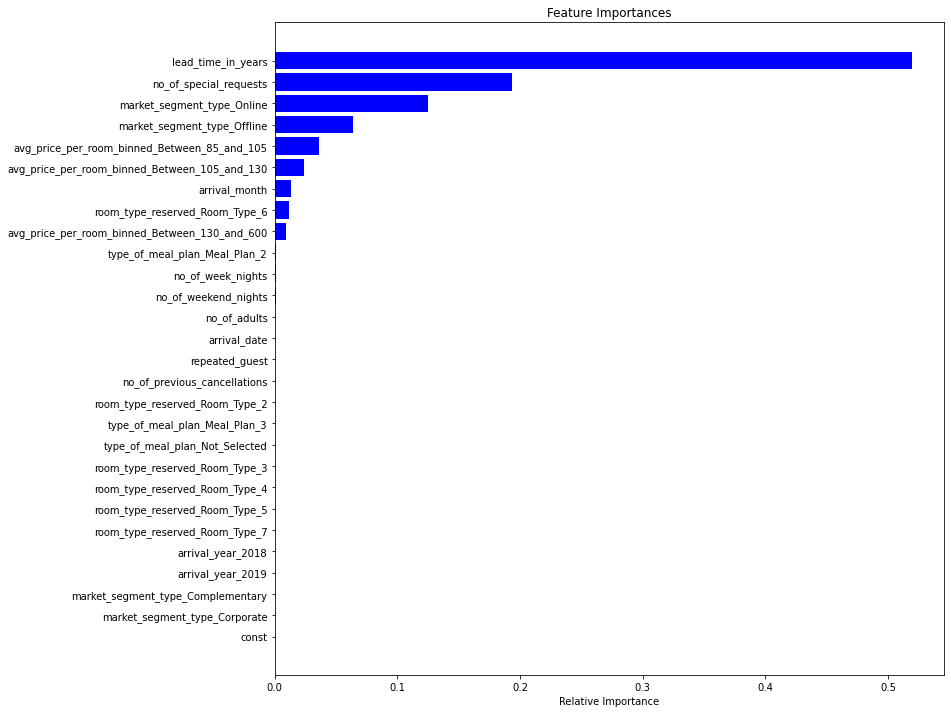

In [230]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [187]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time_in_years <= 0.41
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_in_years <= 0.25
|   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |--- weights: [70.38, 1899.48] class: 1
|   |   |   |   |--- no_of_weekend_nights >  3.50
|   |   |   |   |   |--- weights: [2.38, 1.98] class: 0
|   |   |   |--- lead_time_in_years >  0.25
|   |   |   |   |--- weights: [43.52, 295.02] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time_in_years <= 0.06
|   |   |   |   |--- lead_time_in_years <= 0.02
|   |   |   |   |   |--- weights: [49.64, 601.92] class: 1
|   |   |   |   |--- lead_time_in_years >  0.02
|   |   |   |   |   |--- weights: [183.60, 531.30] class: 1
|   |   |   |--- lead_time_in_years >  0.06
|   |   |   |   |--- room_type_reserved_Room_Type_6 <= 0.50
|   |   |   |   |   |--- weights: [971.04, 1249.38] class: 1
|   |   |   |   |--- room_type_reserved_Room_Type

In [188]:
model_performance(estimator, x_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.77254,0.986854,0.748873,0.851549


In [204]:
#Cost Complexity Pruning

clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [205]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.004194
1,0.000000,0.004194
2,0.000000,0.004194
3,0.000000,0.004194
4,0.000000,0.004194
...,...,...
2168,0.003672,0.295341
2169,0.008718,0.312777
2170,0.012485,0.325262
2171,0.024185,0.373632


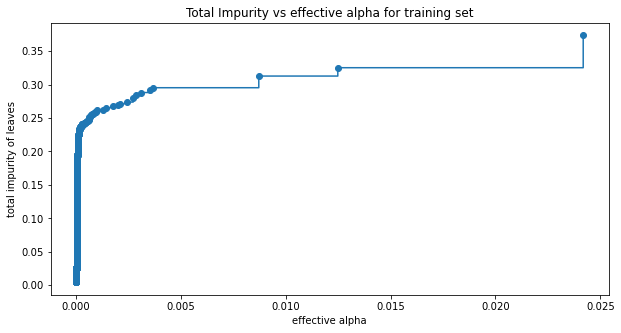

In [206]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [207]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07447795787334172


In [208]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [209]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)


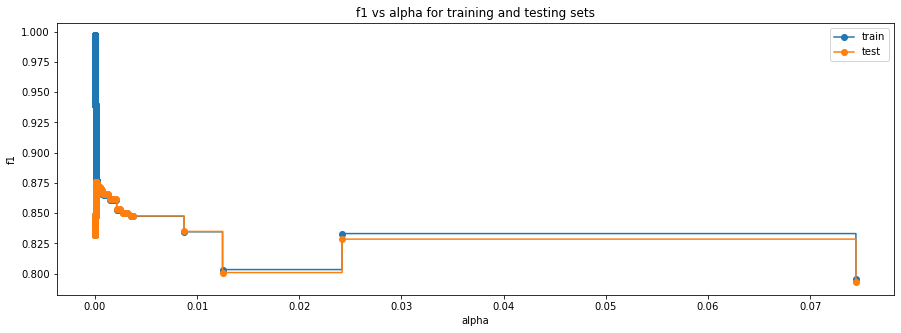

In [210]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("f1")
ax.set_title("f1 vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [211]:
# creating the model where we get highest train and test f1 score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012124279075526653, random_state=1)


In [212]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00012124279075526653, random_state=1)

In [215]:
decision_tree_postpruned_perf_train = model_performance(
    best_model, x_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.794215,0.861283,0.83308,0.846947


In [216]:
best_model.fit(x_test, y_test)

decision_tree_postpruned_perf_test = model_performance(
    best_model, x_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.912863,0.951353,0.918816,0.934802


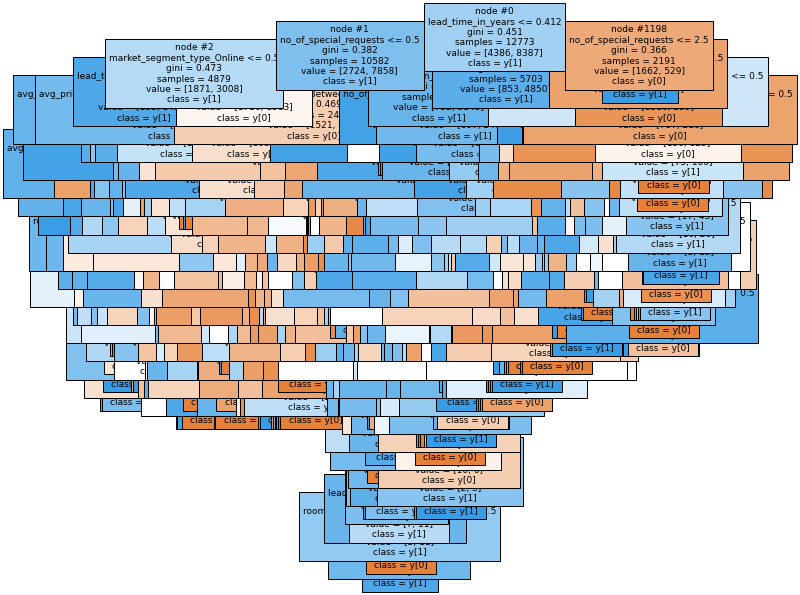

In [217]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

This decision tree is still very complex.  We need to continue to refine.

In [224]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.001, class_weight={0: 0.40, 1: 0.60}, random_state=1
)
best_model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.4, 1: 0.6},
                       random_state=1)

In [233]:
decision_tree_postpruned_perf_train2 = model_performance(
    best_model2, x_train, y_train
)
decision_tree_postpruned_perf_train2

,Accuracy,Recall,Precision,F1
0,0.796128,0.96914,0.77738,0.862733


In [234]:
decision_tree_postpruned_perf_test2 = model_performance(
    best_model2, x_test, y_test
)
decision_tree_postpruned_perf_test2

,Accuracy,Recall,Precision,F1
0,0.794488,0.969,0.77459,0.860957


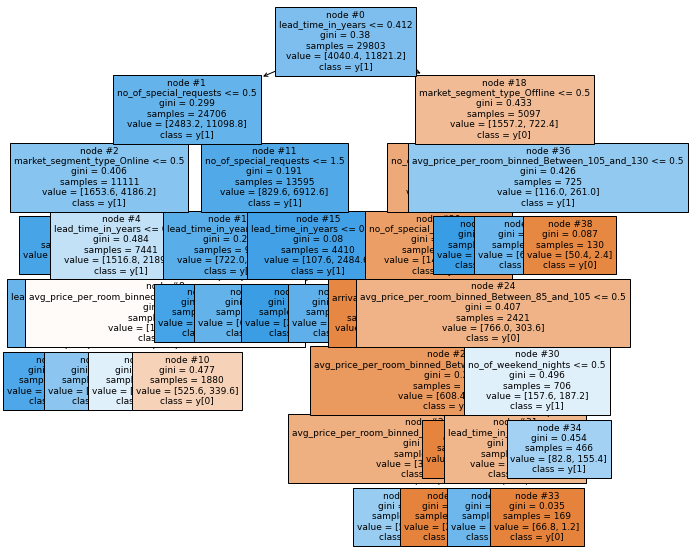

In [227]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

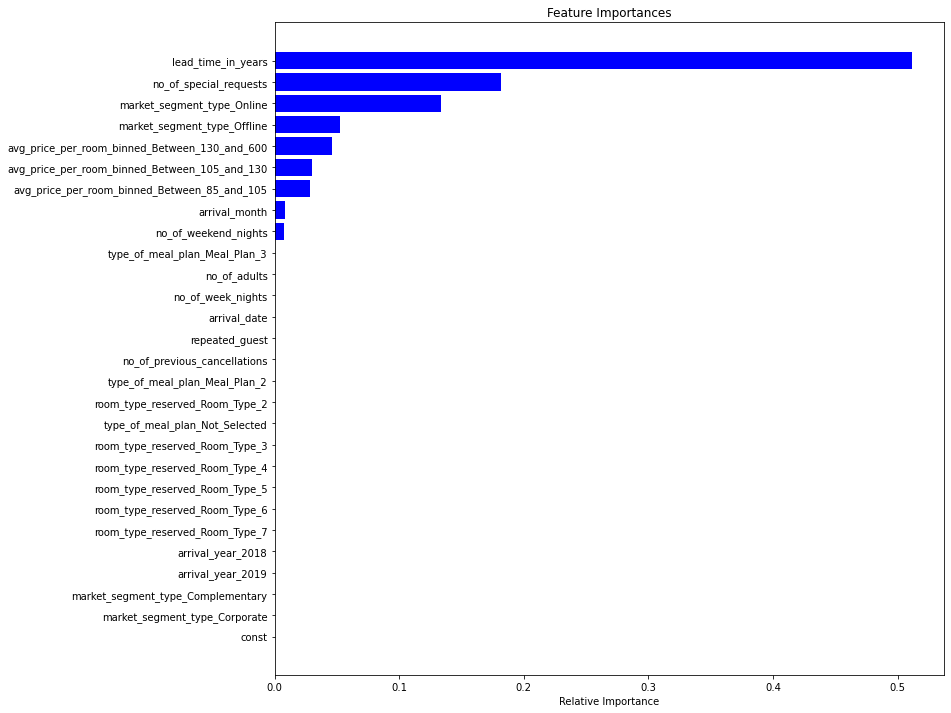

In [231]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

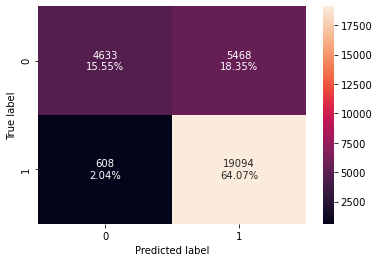

In [232]:
make_confusion_matrix(best_model2, x_train, y_train)

In [236]:
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time_in_years <= 0.41
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [136.80, 1996.80] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time_in_years <= 0.05
|   |   |   |   |--- lead_time_in_years <= 0.02
|   |   |   |   |   |--- weights: [58.40, 547.20] class: 1
|   |   |   |   |--- lead_time_in_years >  0.02
|   |   |   |   |   |--- weights: [162.00, 387.00] class: 1
|   |   |   |--- lead_time_in_years >  0.05
|   |   |   |   |--- avg_price_per_room_binned_Between_130_and_600 <= 0.50
|   |   |   |   |   |--- weights: [770.80, 915.60] class: 1
|   |   |   |   |--- avg_price_per_room_binned_Between_130_and_600 >  0.50
|   |   |   |   |   |--- weights: [525.60, 339.60] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- lead_time_in_years <= 0.04
|   |   |   |   |--- weights: [86.80, 1425.00] class: 1
|   |   |   |--- lead_

#### The decision tree model was pruned using both pre-pruing (GridSearch) and post-pruning (Cost Complexity). The Cost Complexity tuning provided better F1 scores but the model still appears complex.  The pre-pruining method provided generalized and resonably high F1 score and offered a more easily interpretable model.  

## Model Performance Comparison and Conclusions

#### We analyzed the reservation data for Star Hotels with the intent of building a predictive model to identify reservations that are likely to be cancelled.  
* We refined each set of models to maximize their predictability with a focus on balancing false negative and false positive predictions.  
* The Logistic Regression approach required a great deal of data manipulation for the model to function appropriately whereas the Decision Tree approach used largely untreated data and provided similar results.  
* The Decision Tree model offers easy interpretation.
* The most important variables in predicting cancellations are:
	Lead Time
	Number of Specials Request
	Market Segment Online
	Market Segment Offline
	Average Price Per Room


## Actionable Insights and Recommendations

- Lead time is the most important feature for predicting whether or not a reservation will be cancelled.   
- Reservations made more than five months in advance are more likely to be cancelled. 
- The number of special requests is the next most important feature for predicting whether or not a reservation will be cancelled.  
- Those guests making special requests are more likely to not cancel their reservations.
#### Recomendations
* It is recommended that Star Hotels revise their policy to limit advance bookings to five months. 
* Lower room rates could be offered as non-refundable, prepaid at the time of booking.   
* Special requests are important to many customers and should be made available via the online booking portal as they are likely to influence the guests to maintain their reservations.
* If there is cost associated with Meal Plan Types 2 and 3, they should be discontinued as they are rarely selected.
* Online bookings most frequently generated the highest room rates and additional efforts to expand the use of online bookings should be be made.

